In [59]:
import numpy as np
import pandas as pd
import ydata_profiling
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import FactorAnalysis
from imblearn.over_sampling import SMOTE
from statsmodels.multivariate.factor import Factor
from sklearn.dummy import DummyClassifier

In [4]:
dp = pd.read_csv("Churn_Modelling.csv")
dp.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [5]:
df = dp.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
df

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0                  1        101348.88       1              False   
1                  1        112542.58       0              False   
2                  0        113931.57       1              False   
3                  0         93826.63       0              False   
4                  1         79084.10       0              False   
...              ...              ...     ...                ...   
9995               0         96270.64       0              False   
9996               1        101699.77       0              False   
9997               1         42085.58       1              False   
9998               0         92888.52       1               True   
9999               0         38190.78       0              False   

      Geography_Spain  Gender_Male  
0               False        False  
1                True        False  
2               False        False  
3               False        False  
4                True        False  
...               ...          ...  
9995            False         True  
9996            False         True  
9997            False        False  
9998            False         True  
9999            False        False  

[10000 rows x 12 columns]

In [6]:
df.describe()

CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584        0.499797     57510.492818      0.402769  
min        0.00000        0.000000        11.580000      0.000000  
25%        0.00000        0.000000     51002.110000      0.000000  
50%        1.00000        1.000000    100193.915000      0.000000  
75%        1.00000        1.000000    149388.247500      0.000000  
max        1.00000        1.000000    199992.480000      1.000000

In [7]:
df.isna().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64

In [8]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [9]:
ydata_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaled = StandardScaler()

X_train_scaled = scaled.fit_transform(X_train)
X_test_scaled = scaled.transform(X_test)

In [12]:
sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(X_train,y_train)

In [24]:
rfc = RandomForestClassifier()

In [14]:
params = { 'n_estimators': range (20, 200, 10),
              'max_depth': range (5,13, 2),
              'min_samples_leaf': range (1,10),
              'min_samples_split': range (2,10,2) }

In [15]:
rand_search = RandomizedSearchCV(rfc,params,scoring='f1')
rand_search.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': range(5, 13, 2),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10, 2),
                                        'n_estimators': range(20, 200, 10)},
                   scoring='f1')

In [16]:
rand_search.best_params_

{'n_estimators': 170,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_depth': 11}

In [17]:
n_estimators = rand_search.best_params_.get('n_estimators')
max_depth = rand_search.best_params_.get('max_depth')
min_samples_leaf = rand_search.best_params_.get('min_samples_leaf')
min_samples_split = rand_search.best_params_.get('min_samples_split')

In [18]:
params = { 'n_estimators': range (n_estimators - 10, n_estimators + 11, 5),
              'max_depth': range (max_depth - 5,max_depth + 5, 2),
              'min_samples_leaf': range (1,min_samples_leaf+4),
              'min_samples_split': range (2,min_samples_leaf+5,2) }

In [19]:
grid_search = GridSearchCV(rfc,params,scoring ='f1')
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(6, 16, 2),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 6, 2),
                         'n_estimators': range(160, 181, 5)},
             scoring='f1')

In [20]:
grid_search.best_params_

{'max_depth': 14,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 160}

In [21]:
rfc_params = RandomForestClassifier(**grid_search.best_params_)
rfc_rand = RandomForestClassifier(**rand_search.best_params_)

In [26]:
rfc_params.fit(X_train_res,y_train_res)
rfc_rand.fit(X_train_res,y_train_res)
rfc.fit(X_train_res,y_train_res)
prediction_params = rfc_params.predict(X_test)
prediction_rand = rfc_rand.predict(X_test)
prediction = rfc.predict(X_test)
print('Default params: ' + str(f1_score(y_test,prediction)))
print('Randomized search: ' +  str(f1_score(y_test,prediction_rand)))
print('Grid search: ' + str(f1_score(y_test,prediction_params)))

Default params: 0.6087912087912088
Randomized search: 0.5940170940170939
Grid search: 0.6117136659436009


In [27]:
print('Точность модели: ' + str(accuracy_score(y_test, prediction_params)))


Точность модели: 0.821


In [47]:
print('Матрица корреляции')
corr = df.drop(columns=['Exited']).corr()
corr.style.background_gradient(cmap='coolwarm')

Матрица корреляции


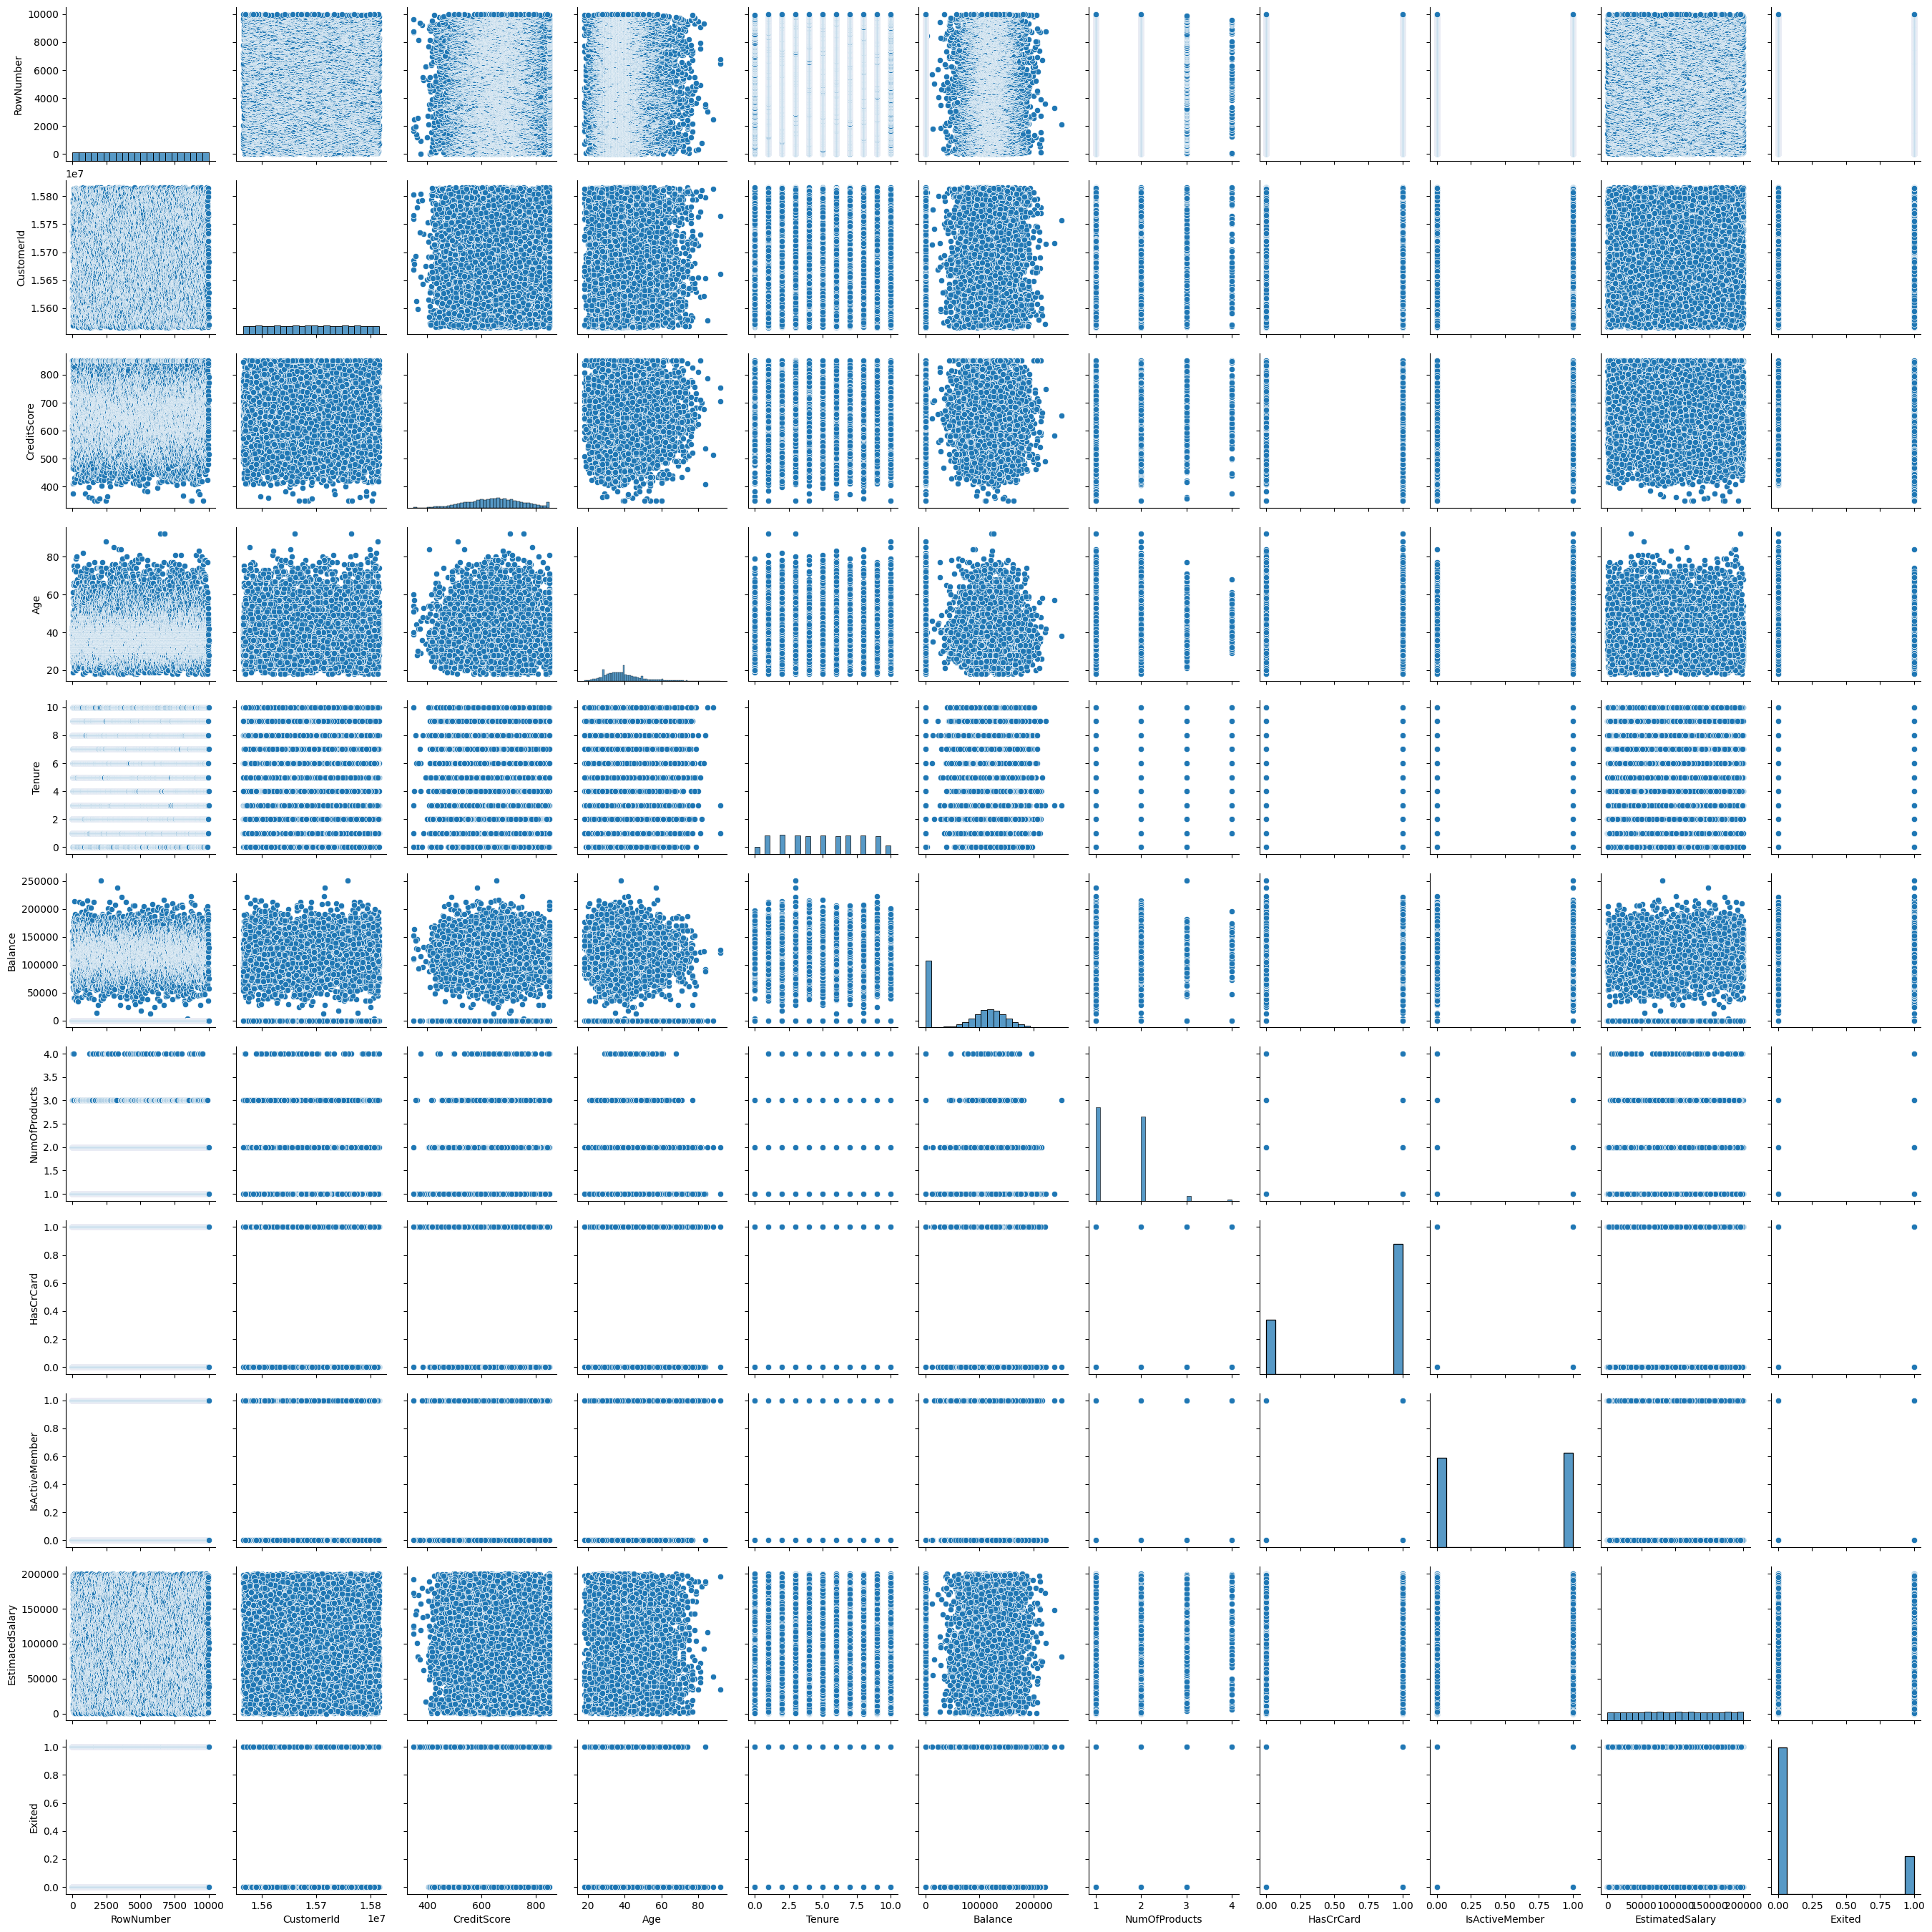

In [57]:
sns.pairplot(dp)

In [80]:
dummy = DummyClassifier(strategy="uniform")
dummy.fit(X_train,y_train)

DummyClassifier(strategy='uniform')

In [81]:
prediction_dummy = dummy.predict(X_test)
print(f1_score(y_test,prediction_dummy))
print(accuracy_score(y_test,prediction_dummy))

0.2694226657163222
0.4875
